In [1]:
import utils
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('shot_logs.csv')

In [3]:
# Choose the features
features = [
    "SHOT_NUMBER",
    "PERIOD",
#     "GAME_CLOCK",
    "SHOT_CLOCK",
    "DRIBBLES",
    "TOUCH_TIME",
    "SHOT_DIST",
    "PTS_TYPE",
    "CLOSE_DEF_DIST",
#     "FGM",  # cant have this because it is knowledge from after the shot (indicates result)
]

non_scaled_features = [
#     "PTS_TYPE"
]

advanced_features = [
    "LOCATION",
    "GAME_ID",
    "MATCHUP",
    "player_id",
    "CLOSEST_DEFENDER_PLAYER_ID",
]
target = ['PTS']

In [4]:
# Run normalization functions
df['SHOT_CLOCK'] = utils.normalize_shotclock(df['SHOT_CLOCK'])
df['LOCATION'] = utils.normalize_location(df['LOCATION'])
df['PTS'] = np.float64(df['PTS'])
features.remove("PTS_TYPE")
df = utils.rescale_features(features, df, non_scaled_features)
features.append("PTS_TYPE")

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.25, random_state=42)

In [6]:
model = LinearRegression(normalize=True, n_jobs=-1)

In [7]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

//anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


0.034925015143825733

In [8]:
def get_score(X_train, y_train):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [9]:
def shuffle_y(X_train, y_train):
    '''
    Randomly shuffles training shot values in place, refits model then returns score
    '''
    np.random.shuffle(y_train)
    return get_score(X_train, y_train)

In [10]:
y = y_train.as_matrix()

In [11]:
model.fit(X_train, y)
actual = model.score(X_test, y_test)

In [12]:
results = []
for i in range(100):
    np.random.shuffle(y)
    model.fit(X_train, y)
    result = model.score(X_test, y_test)
    results.append(result)

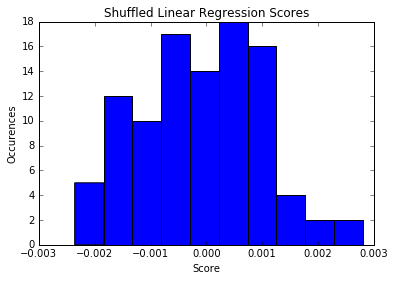

In [13]:
plt.hist(results)
plt.title('Shuffled Linear Regression Scores')
plt.xlabel('Score')
plt.ylabel('Occurences')